<div>
  <img style="float: left;"  width="140" src=" 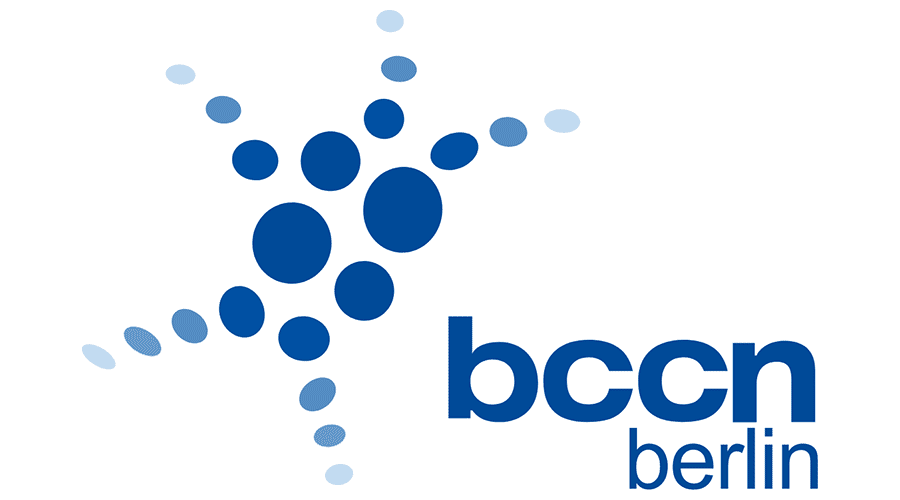">
</div>
 
<h1 id="course-title-heading">
    <div style="text-align: right">
        Models of Higher Brain Functions
        <br>Computer Course
        <br>
    </div>
</h1>
    
---
<div style="text-align: left; float: left">
    Lecturer: Prof. Dr. Henning Sprekeler
</div>

<div style="text-align: right">
    Assistant: Jarek Liesen
    <br>(jarek@bccn-berlin.de)
</div>



## General exercise instructions
These exercises should be completed entirely in this Jupyter Notebook (comprising source code, discussion and interpretation). Submission should be done through the Moodle interface and should consist only of this notebook (**a single `.ipynb` file**). This Jupyter Notebook was provided inside a `.zip` file, alongside additional files. Do not change the relative paths of these files when working on the assignment (meaning that e.g. `./helper.py` should always be in the same directory as this notebook).

Submission deadline is the start of the next lectue (**10:15 am on Fridays**).

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Some of the exercises will be automatically graded. Make sure that you:
1. Fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"
2. Remove all `raise NotImplementedError` lines once you inserted your solution
3. Don't use variable names starting with underscore (e.g. `_myvar`) in your code, which could interfere with the automatic grading system.

Before you start, please fill in below your names and the name of your group as shown on Moodle. Example:
```
NAMES = ["Martina Musterfrau", "John Smith"]
GROUP = "A"
```

If you have any questions about the exercises, please ask them **on the Moodle forum** of the course.

In [1]:
NAMES = ["", ""]
GROUP = ""

In [2]:
# These are a few tests to make sure that your installed Python software is not too old
import sys
assert sys.version_info.major >= 3, "Your Python version is too old, please update it."

import IPython
assert IPython.version_info[0] >= 3, "Your IPython version is too old, please update it."

---

<h1>Table of contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-1:-Singular-Value-Mode-Convergence-(10-points)" data-toc-modified-id="Exercise-1:-Singular-Value-Mode-Convergence-(10-points)-1">Exercise 1: Singular Value Mode Convergence (10 points)</a></span><ul class="toc-item"><li><span><a href="#1.1:-Implement-the-weight-updates" data-toc-modified-id="1.1:-Implement-the-weight-updates-1.1">1.1: Implement the weight updates</a></span><ul class="toc-item"><li><span><a href="#1.1-a)-Define-the-covariance-matrices-and-their-SVD-(1-point)" data-toc-modified-id="1.1-a)-Define-the-covariance-matrices-and-their-SVD-(1-point)-1.1.1">1.1 a) Define the covariance matrices and their SVD (1 point)</a></span></li><li><span><a href="#1.1-b)-Implement-weight-updates-for-a-deep-network-(1-point)" data-toc-modified-id="1.1-b)-Implement-weight-updates-for-a-deep-network-(1-point)-1.1.2">1.1 b) Implement weight updates for a <em>deep</em> network (1 point)</a></span></li><li><span><a href="#1.1-c)-Implement-weight-update-for-a-shallow-network-(1-point)" data-toc-modified-id="1.1-c)-Implement-weight-update-for-a-shallow-network-(1-point)-1.1.3">1.1 c) Implement weight update for a <em>shallow</em> network (1 point)</a></span></li></ul></li><li><span><a href="#1.2:-Simulate-learning-and-singular-value-mode-dynamics" data-toc-modified-id="1.2:-Simulate-learning-and-singular-value-mode-dynamics-1.2">1.2: Simulate learning and singular value mode dynamics</a></span><ul class="toc-item"><li><span><a href="#1.2-a)-Integrate-the-weight-dynamics-(2-point)" data-toc-modified-id="1.2-a)-Integrate-the-weight-dynamics-(2-point)-1.2.1">1.2 a) Integrate the weight dynamics (2 point)</a></span></li><li><span><a href="#1.2-b)-Plot-singular-values-modes-(1-point)" data-toc-modified-id="1.2-b)-Plot-singular-values-modes-(1-point)-1.2.2">1.2 b) Plot singular values modes (1 point)</a></span></li><li><span><a href="#1.2-c)-Discuss-your-results-(1-point)" data-toc-modified-id="1.2-c)-Discuss-your-results-(1-point)-1.2.3">1.2 c) Discuss your results (1 point)</a></span></li></ul></li><li><span><a href="#1.3-Compare-simulation-and-theory" data-toc-modified-id="1.3-Compare-simulation-and-theory-1.3">1.3 Compare simulation and theory</a></span><ul class="toc-item"><li><span><a href="#1.3-a)-Implement-the-analytical-solutions-(1-point)" data-toc-modified-id="1.3-a)-Implement-the-analytical-solutions-(1-point)-1.3.1">1.3 a) Implement the analytical solutions (1 point)</a></span></li><li><span><a href="#1.3-b)-Plot-analytical-and-empirical-singulare-value-dynamics-(1-point)" data-toc-modified-id="1.3-b)-Plot-analytical-and-empirical-singulare-value-dynamics-(1-point)-1.3.2">1.3 b) Plot analytical and empirical singulare value dynamics (1 point)</a></span></li><li><span><a href="#1.3-c)-Discuss-your-results-(1-point)" data-toc-modified-id="1.3-c)-Discuss-your-results-(1-point)-1.3.3">1.3 c) Discuss your results (1 point)</a></span></li></ul></li></ul></li><li><span><a href="#Exercise-2:-Deeper-(non-)linear-networks-with-automatic-differentiation-(10-points)" data-toc-modified-id="Exercise-2:-Deeper-(non-)linear-networks-with-automatic-differentiation-(10-points)-2">Exercise 2: Deeper (non-)linear networks with automatic differentiation (10 points)</a></span><ul class="toc-item"><li><span><a href="#2.0-Data-generation-and-PyTorch-examples-(0-points)" data-toc-modified-id="2.0-Data-generation-and-PyTorch-examples-(0-points)-2.1">2.0 Data generation and PyTorch examples (0 points)</a></span><ul class="toc-item"><li><span><a href="#2.0-a)-Generating-data-with-DiffuseTreeSampler" data-toc-modified-id="2.0-a)-Generating-data-with-DiffuseTreeSampler-2.1.1">2.0 a) Generating data with <code>DiffuseTreeSampler</code></a></span></li><li><span><a href="#2.0-b)-PyTorch-example-for-a-feedforward-neural-network" data-toc-modified-id="2.0-b)-PyTorch-example-for-a-feedforward-neural-network-2.1.2">2.0 b) PyTorch example for a feedforward neural network</a></span></li></ul></li><li><span><a href="#2.1:-Implement-a-variable-depth-deep-linear-network-(1-point)" data-toc-modified-id="2.1:-Implement-a-variable-depth-deep-linear-network-(1-point)-2.2">2.1: Implement a variable depth deep linear network (1 point)</a></span></li><li><span><a href="#2.2:-Define-the-online-gradient-descent-training-loop-(3-points)" data-toc-modified-id="2.2:-Define-the-online-gradient-descent-training-loop-(3-points)-2.3">2.2: Define the online gradient descent training loop (3 points)</a></span></li><li><span><a href="#2.3-Generate-a-data-set-and-train-your-deep-linear-network-(3-points):" data-toc-modified-id="2.3-Generate-a-data-set-and-train-your-deep-linear-network-(3-points):-2.4">2.3 Generate a data set and train your deep linear network (3 points):</a></span></li><li><span><a href="#2.4-Train-a-deep-non-linear-network-(3-points)" data-toc-modified-id="2.4-Train-a-deep-non-linear-network-(3-points)-2.5">2.4 Train a deep non-linear network (3 points)</a></span></li></ul></li></ul></div>

# Week 1: Learning Dynamics in Deep Linear Networks

In [3]:
# Necessary imports for this exercise, you can't modify these
import numpy as np
import matplotlib.pyplot as plt

# Import assert function defined in the ./helpers.py file
from helpers import assert_var_defined

In [4]:
# You can add your additional package imports here

# Create plots inline in the Jupyter notebook
%matplotlib inline

## Exercise 1: Singular Value Mode Convergence (10 points)

This exercise provides computational insights into the learning dynamics in a *deep* linear network \& contrasts them with a *shallow* network. The content of this exercise sheet is closely connected to the analytical exercise sheet, where the equations used here are derived. Read throught the analytical exercise sheet once before starting this one (even if you don't intend to hand in the analytical exercise).

For the first exercise you are given a set of feature and target covariance matrices:

\begin{align*}
	\mathbb{E}[xx^T] = \Sigma^{x} =
	\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0\\
	0 & 0 & 1 & 0\\
	0 & 0 & 0 & 1\\
    \end{bmatrix} \ \ \text{   and   } \ \
	\mathbb{E}[yx^T] = \Sigma^{yx} = \begin{bmatrix}
    1 & 1 & 1 & 1 \\
    1 & 1 & 0 & 0 \\
    0 & 0 & 1 & 1 \\
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1 \\
    \end{bmatrix} \ .
\end{align*}

Throughout this exercise the *deep* linear network is defined to have a single hidden layer with 16 hidden units and $W^1 \in \mathbb{R}^{16 \times 4}$ and $W^2 \in \mathbb{R}^{7 \times 16}$:

$$\hat{y} = W^2 W^1 x \ ,$$

while the *shallow* network is a simple input-output mapping without any hidden layers and $W^{\text{shallow}} \in \mathbb{R}^{7 \times 4}$:

$$\hat{y} = W^{\text{shallow}}x \ .$$

Furthermore, the singular value decomposition of the input-output covariance matrix can be written as:

$$\Sigma^{yx} = U S V^T \ ,$$

where $S \in \mathbb{R}^{4 \times 4}$ denotes the singular value diagonal matrix with non-zero elements $s_\alpha, \alpha=1, \dots, 4$.

### 1.1: Implement the weight updates

First, you will implement the mean weight update equations in the continuous time limit using forward Euler integration.

The mean weight update equations for the *deep* network are:

\begin{align}
\tau \frac{d}{dt} W^1 &= W^{2^T} (\Sigma^{yx} - W^2 W^1 \Sigma^x) \\\\
\tau \frac{d}{dt} W^2 &= (\Sigma^{yx} - W^2 W^1 \Sigma^x)W^{1^T}
\end{align}

And for the *shallow* network:

\begin{align}
\tau \frac{d}{dt} W^{\text{shallow}} &= \Sigma^{yx} - W^{\text{shallow}} \Sigma^x
\end{align}

To understand where the update equations come from, have a look at the analytical exercise sheet.

#### 1.1 a) Define the covariance matrices and their SVD (1 point)
Define two variables `sigma_x` and `sigma_yx` for the covariance matrices $\Sigma^x$ and $\Sigma^{yx}$. Then compute the singular value decomposition (SVD) of the input-output covariance matrix (e.g. by using [`np.linalg.svd`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)). Store the resulting singular value diagonal matrix $S$ in a variable called `s` (lower case).

This task will be automatically graded. Please make sure that you use the variable names as instructed here and that you delete the `raise NotImplementedError()` line.

In [5]:
# YOUR CODE HERE
sigma_x = np.eye(4)
sigma_yx = np.array([[1, 1, 1, 1], 
                    [1, 1, 0, 0],
                    [0, 0, 1, 1],
                    [1, 0, 0, 0],
                    [0, 1, 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]])
_, s, _ = np.linalg.svd(sigma_yx)

The following code cell will check if you defined the correct variable names. Run it to make sure you did.

In [6]:
""" Test that variables `sigma_x`, `sigma_yx` and `s` are defined """

for varname in ["sigma_x", "sigma_yx", "s"]:
    assert_var_defined(varname)
    

#### 1.1 b) Implement weight updates for a *deep* network (1 point)
Implement the weight updates for the *deep* linear network in the function `update_deep_network_weights` below (don't change the order of function arguments and return values).

In [7]:
def update_deep_network_weights(w1, w2, dt, tau, sigma_x, sigma_yx):
    """
    Update the deep network weights for one integration time step.
    
    Parameters
    ----------
    w1 : numpy.ndarray
        W1 weight matrix, connecting input to hidden layer
    w2 : numpy.ndarray
        W2 weight matrix, connection hidden to output layer
    dt : float
        Integration time step for forward Euler
    tau : float
        Time constant of the weight changes (inverse of learning rate)
    sigma_x : numpy.ndarray
        Input covariance matrix
    sigma_yx : numpy.ndarray
        Input-output covariance matrix
        
    Returns
    -------
    w1_updated : numpy.ndarray
        Updated weight matrix W1
    w2_updated : numpy.ndarray
        Updated weight matrix W2
    """
    
    # YOUR CODE HERE
    covar_error = (sigma_yx - w2 @ w1 @ sigma_x)

    w1_updated = w1 + (1/tau) * w2.T @ covar_error * dt
    w2_updated = w2 + (1/tau) * covar_error @ w1.T * dt
    
    return w1_updated, w2_updated

In [8]:
""" Test that the function is defined as instructed """

assert_var_defined("update_deep_network_weights", func=True)


#### 1.1 c) Implement weight update for a *shallow* network (1 point)
Implement the weights updates for the *shallow* linear network in the function `update_deep_shallow_weights` below (don't change the the order of function arguments and return values).

In [9]:
def update_shallow_network_weights(w, dt, tau, sigma_x, sigma_yx):
    """
    Update the shallow network weights for one integration time step.
    
    Parameters
    ----------
    w : numpy.ndarray
        W_shallow weight matrix, connecting input to hidden layer
    dt : float
        Integration time step for forward Euler
    tau : float
        Time constant of the weight changes (inverse of learning rate)
    sigma_x : numpy.ndarray
        Input covariance matrix
    sigma_yx : numpy.ndarray
        Input-output covariance matrix
        
    Returns
    -------
    w_updated : numpy.ndarray
        Updated weight matrix W_shallow
    """
    
    # YOUR CODE HERE
    w_updated = w + (1/tau) * (sigma_yx - w @ sigma_x) * dt
    
    return w_updated

In [10]:
""" Test that the function is defined as instructed """

assert_var_defined("update_shallow_network_weights", func=True)


### 1.2: Simulate learning and singular value mode dynamics

For the special case of no input correlations ($\Sigma^X$ is the unit matrix in our example), we get the following fixed point conditions (marked by $*$) from the weight update equations (to see this, set $\frac{d}{dt} = 0$):

- For the *deep* network:

$$
W^{2,*}W^{1,*} = \Sigma^{yx} \\
$$
    
- For the *shallow* network:

$$
W^{\text{shallow},*} = \Sigma^{yx} \\
$$
    
That means the linear network's input-output mapping learns the input-output covariance structure. To investigate the singular value mode dynamics, we can compute the SVDs on the covariance matrix $\Sigma^{\hat{y}x}(t)$ between the inputs $x$ and the predicted outputs $\hat{y}$ at a given time $t$ during learning:

- For the *deep* network, this corresponds to the SVD of the matrix product $W^2(t)W^1(t)$:

$$
\Sigma^{\hat{y}x} = W^2(t)W^1(t) = U A(t) V^T \\
$$
    
- For the *shallow* network, this corresponds to the SVD of the matrix $W^{\text{shallow}}$:

$$
\Sigma^{\hat{y}x} = W^{\text{shallow}}(t) = U B(t) V^T \\
$$

This gives us the singular value modes $a_\alpha(t)$ and $b_\alpha(t)$, which are the diagonal elements of the diagonal matrices $A(t)$ and $B(t)$ ($\alpha = 1, ... 4$).
       

#### 1.2 a) Integrate the weight dynamics (2 point)
Perform weight updates in the *deep* and *shallow* networks for the given covariance matrices $\Sigma^{x}$ and $\Sigma^{yx}$ (use the functions defined in 1.1). Start with Gaussian initialised weight matrices (with mean $\mu = 0$ and standard deviation $\sigma = 0.01$). Set the time constant $\tau = 1/\eta$ with learning rate $\eta=0.4$ and integrate for a total time $T = 15$ with an integration time step of $\Delta t = 0.1$. After each update of the weight matrices, compute the singular value modes $a_\alpha(t)$ and $b_\alpha(t)$.

In [11]:
# YOUR CODE HERE
# raise NotImplementedError()

# Initialise values
tau = 1/0.4
T = 15
dt = 0.1

w1 = np.random.normal(0, 0.01, (16,4))
w2 = np.random.normal(0, 0.01, (7,16))
w = np.random.normal(0, 0.01, (7,4))

a_traj = np.zeros((4, int(T/dt)))
b_traj = np.zeros((4, int(T/dt)))

for t in range(0,int(T/dt)):
    # Update weights
    w1, w2 = update_deep_network_weights(w1, w2, dt, tau, sigma_x, sigma_yx)
    w = update_shallow_network_weights(w, dt, tau, sigma_x, sigma_yx)

    # Calculate trajectories of single values
    _, a, _ = np.linalg.svd(w2 @ w1)
    _, b, _ = np.linalg.svd(w)

    a_traj[:,t] = a
    b_traj[:,t] = b

#### 1.2 b) Plot singular value modes (1 point)
Plot the dynamics of the singular value modes $a_\alpha(t)$ and $b_\alpha(t)$, together with the singular values $s_{\alpha}$ of the covariance matrix $\Sigma^{yx}$.

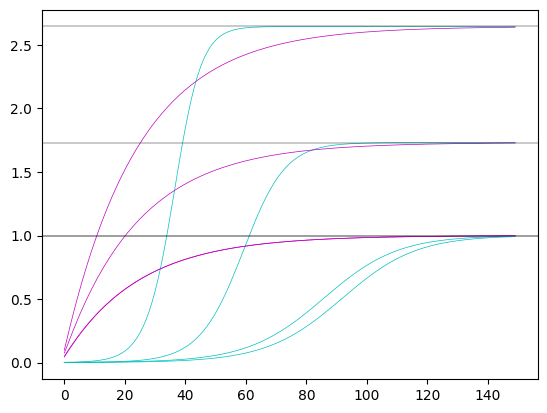

In [12]:
# YOUR CODE HERE
# raise NotImplementedError()

ax = plt.subplot()
for i in range(s.shape[0]):
    
    ax.plot(a_traj[i,:], c='c', linewidth=0.5, label='a(t)')
    ax.plot(b_traj[i,:], c='m', linewidth=0.5, label='b(t)')
    ax.axhline(s[i], c='k', linewidth=0.3, label='s')

#### 1.2 c) Discuss your results (1 point)
How do the singular value modes between the *deep* and *shallow* network compare to each other and to the singular values of the input-output covariance matrix?

In the deep network, modes with a larger singular value (therefore modes which best explain the data) are learned the fastest. Ie. the *effective* learning rate is strongly correlated to the singular value magnitude for each mode. 

In the shallow network, all modes are effectively learned simultaneously with a very weak dependence on their singular values. 

The learning curves for the deep and shallow networks are visibly sigmoidal and exponential respectively. The deep network can therefore show a "step-like" learning trajectory given a large enough singular value for a particular node, whereas the shallow network will show steady learning.

### 1.3 Compare simulation and theory
For the linear neural networks which you implemented here, the singular value mode dynamics can be computed analytically. The analytical solutions are:

- For the *deep* network:

$$
a_\alpha(t) = \frac{s_\alpha e^{2s_\alpha t/\tau}}{e^{2s_\alpha t/\tau} - 1 + s_\alpha/a^0_\alpha}
$$

- For the *shallow* network:

$$
b_\alpha(t) = s_\alpha(1-e^{-t/\tau}) + b_\alpha^0e^{-t/\tau}
$$

#### 1.3 a) Implement the analytical solutions (1 point)
Compute the singular value mode dynamics (for different time steps between $t = 0$  and $t = T$) using the analytic solutions with $a_\alpha^0 = b_\alpha^0 = 0.001$.


In [13]:
# YOUR CODE HERE
# raise NotImplementedError()

a_analytic = np.zeros((4, int(T/dt)))
b_analytic = np.zeros((4, int(T/dt)))

for t in range(0,int(T/dt)):

    a_analytic[:,t] = (s * np.exp(2 * s * t * dt / tau))/(np.exp(2 * s * t * dt / tau) - 1 + s/0.001)
    b_analytic[:,t] = s * (1 - np.exp(-t * dt / tau)) + 0.001 * np.exp(-t * dt / tau)

#### 1.3 b) Plot analytical and empirical singulare value dynamics (1 point)
Plot the analytically calculated singular value mode dynamics together with the empirical ones simulated in the previous section.

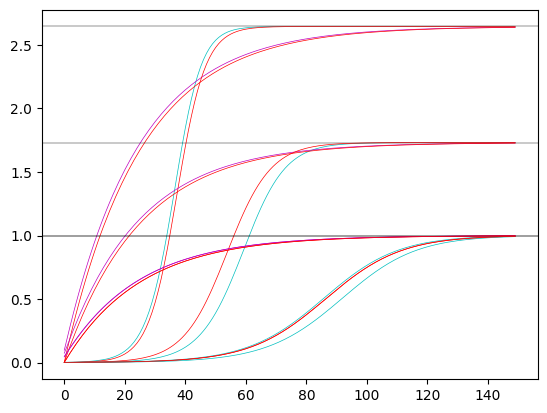

In [14]:
# YOUR CODE HERE
# raise NotImplementedError()

ax = plt.subplot()
for i in range(s.shape[0]):
    
    ax.plot(a_traj[i,:], c='c', linewidth=0.5, label='a(t)')
    ax.plot(b_traj[i,:], c='m', linewidth=0.5, label='b(t)')
    ax.axhline(s[i], c='k', linewidth=0.3, label='s')
    ax.plot(a_analytic[i,:], c='r', linewidth=0.5, label='a(t)')
    ax.plot(b_analytic[i,:], c='r', linewidth=0.5, label='b(t)')

#### 1.3 c) Discuss your results (1 point)
How well do theory and simulation align?

Theory and simulation align very well, given the initial conditions.

---

## Exercise 2: Deeper (non-)linear networks with automatic differentiation (10 points)

In this exercise we will probe whether the theoretical results \& insights from the previous exercise translate to deeper linear networks as well as non-linear networks.

Deep Learning is powered by reverse mode automatic differentiation, computational graphs \& stochastic gradient descent algorithms.
We will use the Python library PyTorch for automatic differenatiation due to its easy installation, documentation \& recent popularity in academic research. If you are unfamiliar with PyTorch, you might find [this introductions](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) useful. Don't worry, the trained networks are fairly small, do not involve convolutions \& can therefore easily be trained on any CPU.

You can install PyTorch e.g. via `pip install torch` or `conda install pytorch`. If it doesn't work out of the box or if you want to have GPU support, you can find a suitable installation command at https://pytorch.org/.

In [15]:
# Necessary imports for this exercise, you can't modify these
from collections import OrderedDict

try:
    import torch
except ModuleNotFoundError:
    raise ModuleNotFoundError(
        "You need pytorch for this exercise. See installation instructions above."
    )

import torch.nn as nn
    
from helpers import DiffuseTreeSampler

### 2.0 Data generation and PyTorch examples (0 points)

This section will give an example for how to create a neural network with PyTorch and how to generate data to train it in the following exercises.

#### 2.0 a) Generating data with `DiffuseTreeSampler`

In order to train a neural network on the same kind of task as was done in exercise 1, we need a data set $\{\bf{x}^\alpha, y^\alpha\}_{\alpha = 1, \cdots, N}$ with $N$ data samples, each consisting of an item vector $\bf{x}^\alpha$ (the input to our network) and its associated property or feature vector $\bf{y}^\alpha$ (the output of our network). We will use the `DiffuseTreeSampler` class to generate such data throughout this exercise. It is defined in `./helpers.py` and implements a hierarchical data-generation process (**no need to implement anything from scratch, you can just used it as shown below**).

The hierarchically structured data is generated through a branching diffusion
process (see image below). To generate a single feature $y_i^\alpha$ for multiple items $\alpha$, an initial binary value is determined through a coin flip at the top of the hierarchy. The sign of this value flips with a small probability along each link in the tree. At the bottom, this yields the value of one feature $y_i^\alpha$ across items $\alpha$. Many features are generated by repeatedly sampling from this process independently. The $\pm 1$ values depicted in the figure below are one possible sampling.

<div>
    <img width="400" src=" 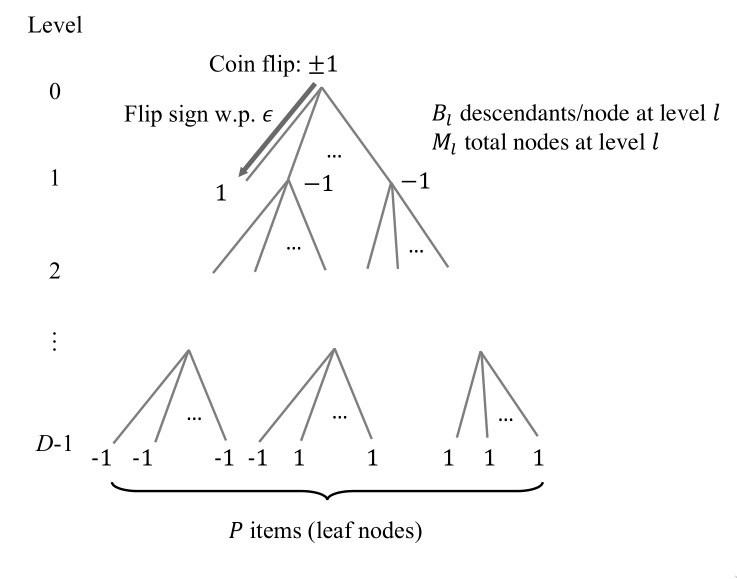">
</div>

This figure comes from the Supplementary Information in [Saxe et al. (2019)](https://www.pnas.org/content/116/23/11537), where you can find more information on this process.

Below is an example on how to generate data with the `DiffuseTreeSampler` class and how to compute the singular values for the generated data set. The hierarchical structue in the data can be visualized by plotting the covariance matrix of the features.

Vary the parameters of the `DiffuseTreeSampler` and see how that changes the structre in the generated data.

Number of data samples: 64
Feature vector dimension: 50
Item vector dimension: 64

First feature vector:
[-1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1
 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1  1
  1  1]

First item vector:
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Text(0.5, 1.0, 'Item covariance matrix')

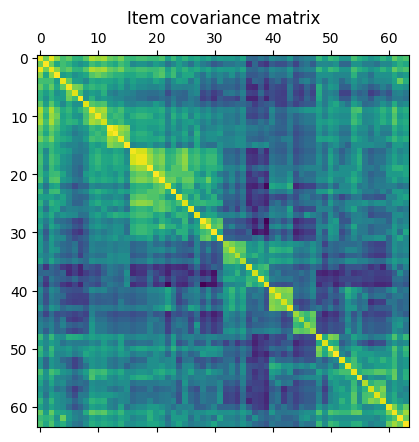

In [16]:
# Create the dataset by instantiating and sampling
hierarchical_tree = DiffuseTreeSampler(feature_dim=50, tree_depth=3,
                                       branching_factor=4, sample_epsilon=0.05)
features, items = hierarchical_tree.sample_data()

assert features.shape[0] == items.shape[0]
print(f"Number of data samples: {features.shape[0]}")
print(f"Feature vector dimension: {features.shape[1]}")
print(f"Item vector dimension: {items.shape[1]}\n")
print(f"First feature vector:\n{features[0]}\n")
print(f"First item vector:\n{items[0]}")
plt.matshow(np.cov(features))
plt.title("Item covariance matrix")

In [17]:
# Compute the singular values of the generated dataset
sigma_yx = features.T @ items
U, s, V = np.linalg.svd(sigma_yx, full_matrices=True)

#### 2.0 b) PyTorch example for a feedforward neural network

Here, you can see an example of a feedforward neural network defined in PyTorch and how it can be trained on the data we generated in the previous section. The important steps shown below are:

1. Define a neural network architecture (here a single hidden layer with ReLU activation function). In PyTorch, this is done by inheriting from the [`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html) class and implementing the `forward` method, which should generate the network output for a given input.

In [18]:
class ExampleNetwork(nn.Module):
    """
    This is a deep neural network in PyTorch. In this case with a single hidden layer
    with ReLU activation function.
    """
    def __init__(self, input_dim, output_dim):
        """
        This is the class constructor. It is called when you intantiate an instance of
        this class.
        
        Parameters
        ----------
        input_dim : float
            Dimension of the network input
        output_dim : float
            Dimension of the network output
        
        Example
        -------
        >>> network_instance = ExampleNetwork()
        """
        
        # Call the constructor (`__init__`) of the parent class (nn.Module)
        super().__init__()

        # Define a dictionary that collects the different layers.
        # Afterwards, this dictionary provides the input to the nn.Sequential model
        layers = OrderedDict()
        layers["input_to_hidden"] = nn.Linear(input_dim, 64, bias=False)
        layers["input_to_hidden_activation"] = nn.ReLU()
        layers["hidden_to_output"] = nn.Linear(64, output_dim, bias=False)
        self.model = nn.Sequential(layers)
        
    def forward(self, input_tensor):
        """
        This method implements the forward path of the neural network. Every PyTorch
        network that inherits from `nn.Module` has to define this function.
        
        Parameters
        ----------
        input_tensor : torch.tensor
            The input to the network
            
        Returns
        -------
        torch.tensor
            The output of the network
        """
        
        # Propagate the input through the linear network
        return self.model(input_tensor.float())

2. Create a network instance, an optimizer object (here we use stochastic gradient descent ([`torch.optim.SGD`](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD))) and a loss function (here we use mean squared error loss ([`nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)).

In [19]:
input_dim = items.shape[1]
output_dim = features.shape[1]

learning_rate = 0.5
network_instance = ExampleNetwork(input_dim, output_dim)
sgd_optimizer = torch.optim.SGD(network_instance.parameters(), lr=learning_rate)

mse_loss = nn.MSELoss()

print("The Network Architecture:\n")
print(network_instance)

The Network Architecture:

ExampleNetwork(
  (model): Sequential(
    (input_to_hidden): Linear(in_features=64, out_features=64, bias=False)
    (input_to_hidden_activation): ReLU()
    (hidden_to_output): Linear(in_features=64, out_features=50, bias=False)
  )
)


3. Perform a forward pass of the network to get predictions and calculate the loss. To perform the forward pass, the network instance has to be called directly with `network_instance()`. This will call the `nn.Module.__call__` method, which will use your `ExampleNetwork.forward` method to calculate the forward pass and will add some PyTorch magic that will compute the gradients for you.
4. Reset any gradients that might have been stored before to $0$ and perform a backward pass to calculate the new gradients based on your last forward pass. Finally, perform one SGD optimization step to update your network parameters.

In [20]:
### 3.
# Get the first feature and target from your dataset
input_tensor = torch.tensor(items[0])
y_true = torch.tensor(features[0]).float()

# Perform a forward pass through the network
y_hat = network_instance(input_tensor)

# Calculate the loss for the first data point
loss = mse_loss(y_hat, y_true)
print("The MSE Loss for the 1st data point is {:.3f}".format(loss)) 

### 4.
# Reset gradients
network_instance.zero_grad()
gradient_sum_before = network_instance.model.input_to_hidden.weight.grad
print(f"Gradients input to hidden weights after reset: {gradient_sum_before}")

# Compute new gradients by performing a backword pass
loss.backward()
gradient_sum_after = network_instance.model.input_to_hidden.weight.grad.sum()
print(f"Gradient sum input to hidden weights after backward pass: {gradient_sum_after}")

# Update the weights using the SGD optimizer
sgd_optimizer.step()

The MSE Loss for the 1st data point is 1.008
Gradients input to hidden weights after reset: None
Gradient sum input to hidden weights after backward pass: 0.15242795646190643


### 2.1: Implement a variable depth deep linear network (1 point)
Code a variable depth deep linear network class that takes as an input a list of hidden units for each layer (e.g. `hidden_units=[16, 32, 32, 16]`). Use the `DeepLinearNetwork` class skeleton defined below. In the `### YOUR CODE HERE` section, loop over the hidden layers in the network to define the full network architecture (use `nn.Linear` as already done for the first and last layers of the network).

In [21]:
class DeepLinearNetwork(nn.Module):
    """
    A deep liner neural network with a variable number of hidden layers
    """
    def __init__(self, input_dim=64, output_dim=100, hidden_units=[64]):
        """
        This is the class constructor. It is called when you intantiate an instance of
        this class.
        
        Parameters
        ----------
        input_dim : float
            Dimension of the network input
        output_dim : float
            Dimension of the network output
        """
            
        # Call the class constructor (__init__) of the parent class (nn.Module)
        super().__init__()
        
        # Define a dictionary that collects the different layers
        # This dictionary will provide the input to the nn.Sequential model
        layers = OrderedDict()
        layers["input_to_hidden"] = nn.Linear(
            input_dim, hidden_units[0], bias=False
        )
        
        # YOUR CODE HERE
        # raise NotImplementedError()
        for l in range(len(hidden_units)-1):
            layer_name = "hidden" + str(l) + "_to_hidden" + str(l+1)
            layers[layer_name] = nn.Linear(
                hidden_units[l], hidden_units[l+1], bias=False
            )    
        
        layers["hidden_to_output"] = nn.Linear(
            hidden_units[-1], output_dim, bias=False
        )
        self.model = nn.Sequential(layers)
        
    def forward(self, input_tensor):
        """
        This method implements the forward path of the neural network. Every PyTorch
        network that inherits from `nn.Module` has to define this function.
        
        Parameters
        ----------
        input_tensor : torch.tensor
            The input to the network
            
        Returns
        -------
        torch.tensor
            The output of the network
        """
        
        # Propagate the input through the linear network
        return self.model(input_tensor.float())

In [22]:
""" Test that the class is defined as instructed """

assert_var_defined("DeepLinearNetwork", func=True)


### 2.2: Define the online gradient descent training loop (3 points)
Complement the learning loop defined in the `train_network` function below. This will require multiple small steps:

1. Shuffle the data ordering at the beginning of each training epoch.
2. Perform the forward pass at each iteration for a selected input-target pair.
3. Calculate the corresponding loss using the mean squared error (MSE) loss.
4. Reset the parameter gradients, perform a backwards pass to calculate the current gradients \& update the parameters with the help of an optimizer object.

In [23]:
def train_network(network, loss_func, optimizer, num_epochs, inputs, targets):
    """
    Train a neural network by running the training loop

    Parameters
    ----------
    network : nn.Module
        An instance of a PyTorch neural network class, that inherits from `nn.Module`,
        e.g. an instance of the `DeepLinearNetwork` class.
    loss_func : nn._Loss
        A PyTorch loss criterion, e.g. an instance of `nn.MLELoss`, which measures the
        mean squared error (MSE) between each element of two vectors.
    optimizer : torch.optim.Optimizer
        PyTorch optimizer object, e.g. an instance of `torch.optim.SGE`, which implements
        stochastic gradien descent (SGD)
    num_epochs : int
        Number of training loops over the entire dataset
    inputs : numpy.ndarray
        Inputs used for training the network
    targets : numpy.ndarray
        Output targets for computing the training loss during training
    """
    loss_log = []
    log_singular_vals = []
    num_points = targets.shape[0]

    for epoch in range(num_epochs):
        epoch_loss = 0
        
        ### 1. Shuffle the data ordering
        # YOUR CODE HERE
        # raise NotImplementedError()
        idx = np.random.permutation(len(inputs))
        inputs, targets = inputs[idx], targets[idx]
        
        # Loop over all examples in an Online SGD Loop
        for t in range(num_points):
            # Extract the current training datapoint and transform it into a Torch Tensor
            input_tensor = torch.tensor(inputs[t])
            y_true = torch.tensor(targets[t]).float()
                
            ### 2. Perform the forward pass, which computes the prediction for the single
            ###    datapoint y^hat
            # YOUR CODE HERE
            # raise NotImplementedError()
            y_hat = network.forward(input_tensor)
            
            ### 3. Compute the corresponding loss
            # YOUR CODE HERE
            # raise NotImplementedError()
            loss = loss_func(y_hat, y_true)
                     
            # 4. Clear the gradients, Perform the backward pass, and SGD update
            # YOUR CODE HERE
            # raise NotImplementedError()
            network.zero_grad()
            loss.backward()
            optimizer.step()        
            
            # Update the epoch loss tracker
            epoch_loss += loss.item()
        
        # Log the mean epoch loss & calculate the SVD
        loss_log.append(epoch_loss/num_points)
        # Note that `inputs` is a unit matrix
        y_hat_full = network(torch.tensor(inputs)).detach().numpy()
        U, s, V = np.linalg.svd(y_hat_full.T, full_matrices=True)
        log_singular_vals.append(s)

    return loss_log, np.array(log_singular_vals)

In [24]:
""" Test that the function is defined as instructed """

assert_var_defined("train_network", func=True)


### 2.3 Generate a data set and train your deep linear network (3 points):
Create a dataset by creating an instance of the `DiffuseTreeSampler` class and sampling from it. Afterwards, compute the SVD of $\Sigma^{yx}$ and assert that $\Sigma^x = \mathbf{1}$. Then, train a deep linear network:

1. Instantiate your `DeepLinearNetwork` with three hidden layers (`hidden_units=[64, 128, 128]`).
2. Instantiate a stochastic gradient descent optimizer object with learning rate $\eta = 0.5$.
3. Define the mean squared error (MSE) loss function.
4. Run the `train_network` loop for 200 epochs.

After each epoch (loop over the entire dataset) compute the SVD of the covariance matrix $\Sigma^{\hat{y}x}$, which is (as in exercise 1) the product of the linear network weight matrices (since we have no input correlations). Note that in this case the product of weight matrices can be simply obtained by forward propagating a unit matrix through the network. Plot the evolution of the singular value modes over the course of the learning epochs as well as the static singular values of $\Sigma^{yx}$.


Text(0.5, 1.0, 'Evolution of network singular values')

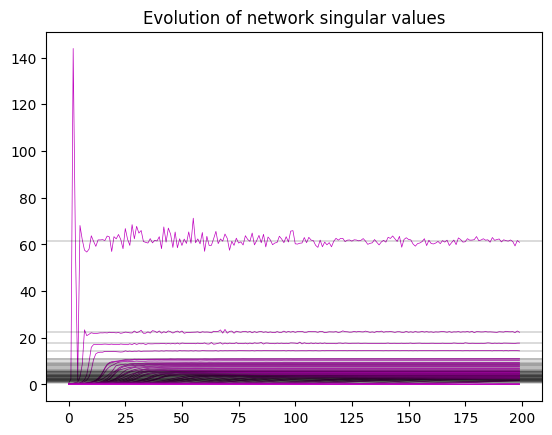

In [25]:
# Create a dataset by sampling from an instance of DiffuseTreeSampler
hierarchical_tree = DiffuseTreeSampler(feature_dim=100, tree_depth=3,
                                       branching_factor=4, sample_epsilon=0.05)
features, items = hierarchical_tree.sample_data()

# Compute the SVD and assert that sigma_x = 1
sigma_yx = features.T @ items
U, s, V = np.linalg.svd(sigma_yx, full_matrices=True)

sigma_x = items.T @ items
assert np.all(items == np.eye(sigma_x.shape[0],sigma_x.shape[1]))

# 1. Instantiate a DeepLinearNetwork with three hidden layers
input_dim = items.shape[1]
output_dim = features.shape[1]
network_instance = DeepLinearNetwork(input_dim, output_dim, hidden_units=[64,128,128])

# 2. SGD optimizer
learning_rate = 0.5
sgd_optimizer = torch.optim.SGD(network_instance.parameters(), lr=learning_rate)

# MSE loss func
mse_loss = nn.MSELoss()

# run the training loop for 200 epochs
loss_lg, singular_vals = train_network(network_instance, mse_loss, sgd_optimizer, 200, items, features)

# Plot the evolution of the singular values
fig, ax = plt.subplots()
for i in range(singular_vals.shape[1]):
    ax.plot(singular_vals[:,i], c='m', linewidth=0.5)
    ax.axhline(s[i], c='k', linewidth=0.2)
plt.title("Evolution of network singular values")

### 2.4 Train a deep non-linear network (3 points)
Do the results hold up for both deep linear and non-linear networks? Implement a ReLU activation after every linear layer and repeat the steps in exercise 2.3. Which singular values converge first?

The results hold up for both networks, with larger singular values converging first. That said, the non-linear deep network is more robust to large gradients in early training (doesn't suffer as much overshoot).

In [26]:
class DeepNonLinearNetwork(nn.Module):
    """
    A deep liner neural network with a variable number of hidden layers
    """
    def __init__(self, input_dim=64, output_dim=100, hidden_units=[64]):
        """
        This is the class constructor. It is called when you intantiate an instance of
        this class.
        
        Parameters
        ----------
        input_dim : float
            Dimension of the network input
        output_dim : float
            Dimension of the network output
        """
            
        # Call the class constructor (__init__) of the parent class (nn.Module)
        super().__init__()
        
        # Define a dictionary that collects the different layers
        # This dictionary will provide the input to the nn.Sequential model
        layers = OrderedDict()
        layers["input_to_hidden"] = nn.Linear(
            input_dim, hidden_units[0], bias=False
        )
        layers["relu0"] = nn.ReLU()
        
        # YOUR CODE HERE
        # raise NotImplementedError()
        for l in range(len(hidden_units)-1):
            layer_name = "hidden" + str(l) + "_to_hidden" + str(l+1)
            layers[layer_name] = nn.Linear(
                hidden_units[l], hidden_units[l+1], bias=False
            )
            relu_name = "relu" + str(l+1)
            layers[relu_name] = nn.ReLU()
        
        layers["hidden_to_output"] = nn.Linear(
            hidden_units[-1], output_dim, bias=False
        )
        self.model = nn.Sequential(layers)
        
    def forward(self, input_tensor):
        """
        This method implements the forward path of the neural network. Every PyTorch
        network that inherits from `nn.Module` has to define this function.
        
        Parameters
        ----------
        input_tensor : torch.tensor
            The input to the network
            
        Returns
        -------
        torch.tensor
            The output of the network
        """
        
        # Propagate the input through the linear network
        return self.model(input_tensor.float())

Text(0.5, 1.0, 'Evolution of network singular values')

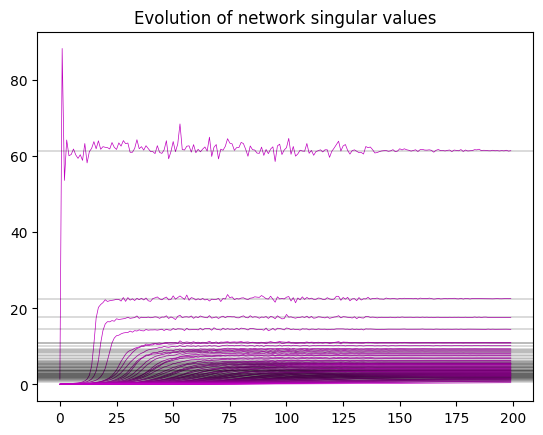

In [27]:
# 1. Instantiate a DeepLinearNetwork with three hidden layers
input_dim = items.shape[1]
output_dim = features.shape[1]
network_instance = DeepNonLinearNetwork(input_dim, output_dim, hidden_units=[64,128,128])

# 2. SGD optimizer
learning_rate = 0.5
sgd_optimizer = torch.optim.SGD(network_instance.parameters(), lr=learning_rate)

# MSE loss func
mse_loss = nn.MSELoss()

# run the training loop for 200 epochs
loss_lg, singular_vals = train_network(network_instance, mse_loss, sgd_optimizer, 200, items, features)

# Plot the evolution of the singular values
fig, ax = plt.subplots()
for i in range(singular_vals.shape[1]):
    ax.plot(singular_vals[:,i], c='m', linewidth=0.5)
    ax.axhline(s[i], c='k', linewidth=0.2)
plt.title("Evolution of network singular values")